In [2]:

# Geocoding is the process of converting an address into latitude and longitude coordinates. 
# Reverse geocoding is the process of converting latitude and longitude coordinates into an address.

import pandas as pd
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='ryan-data')


cities = {"City": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          "Population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "Country": ["England", "Germany", "Spain", "Italy",
                      "France", "Austria", "Romania", 
                      "Germany", "Hungary", "Poland", "Spain",
                      "Germany", "Italy"]}

df = pd.DataFrame(cities)
df


,City,Population,Country
0,London,8615246,England
1,Berlin,3562166,Germany
2,Madrid,3165235,Spain
3,Rome,2874038,Italy
4,Paris,2273305,France
5,Vienna,1805681,Austria
6,Bucharest,1803425,Romania
7,Hamburg,1760433,Germany
8,Budapest,1754000,Hungary
9,Warsaw,1740119,Poland


In [3]:

#Importing the required modules
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
 
 
#Creating an instance of Nominatim Class
geolocator = Nominatim(user_agent="ryan_geo")
 
#applying the rate limiter wrapper
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
geocode = RateLimiter(geolocator.geocode)
 
#Applying the method to pandas DataFrame
df['location'] = df['Country'].apply(geocode)
df['Lat'] = df['location'].apply(lambda x: x.latitude if x else None)
df['Lon'] = df['location'].apply(lambda x: x.longitude if x else None)
 
df


,City,Population,Country,location,Lat,Lon
0,London,8615246,England,"(England, United Kingdom, (52.5310214, -1.2649...",52.531021,-1.264906
1,Berlin,3562166,Germany,"(Germany, West Wheatfield Township, Indiana Co...",40.420348,-79.116698
2,Madrid,3165235,Spain,"(España, (39.3260685, -4.8379791))",39.326068,-4.837979
3,Rome,2874038,Italy,"(Italia, (42.6384261, 12.674297))",42.638426,12.674297
4,Paris,2273305,France,"(France, (46.603354, 1.8883335))",46.603354,1.888334
5,Vienna,1805681,Austria,"(Austria, El Chorro, Álora, Valle del Guadalho...",36.914851,-4.753450
6,Bucharest,1803425,Romania,"(România, (45.9852129, 24.6859225))",45.985213,24.685923
7,Hamburg,1760433,Germany,"(Germany, West Wheatfield Township, Indiana Co...",40.420348,-79.116698
8,Budapest,1754000,Hungary,"(Hungary, Granby, Capitol Planning Region, Con...",41.976763,-72.778984
9,Warsaw,1740119,Poland,"(Polska, (52.215933, 19.134422))",52.215933,19.134422


In [4]:

from geopy.geocoders import Nominatim

out = (
        df.assign(Geocodes= (df['Country']).apply(geolocator.geocode))
          .assign(Latitude = lambda x: [g.latitude for g in x['Geocodes']],
                  Longitude= lambda x: [g.longitude for g in x['Geocodes']])
      )

out


,City,Population,Country,location,Lat,Lon,Geocodes,Latitude,Longitude
0,London,8615246,England,"(England, United Kingdom, (52.5310214, -1.2649...",52.531021,-1.264906,"(England, United Kingdom, (52.5310214, -1.2649...",52.531021,-1.264906
1,Berlin,3562166,Germany,"(Germany, West Wheatfield Township, Indiana Co...",40.420348,-79.116698,"(Germany, West Wheatfield Township, Indiana Co...",40.420348,-79.116698
2,Madrid,3165235,Spain,"(España, (39.3260685, -4.8379791))",39.326068,-4.837979,"(España, (39.3260685, -4.8379791))",39.326068,-4.837979
3,Rome,2874038,Italy,"(Italia, (42.6384261, 12.674297))",42.638426,12.674297,"(Italia, (42.6384261, 12.674297))",42.638426,12.674297
4,Paris,2273305,France,"(France, (46.603354, 1.8883335))",46.603354,1.888334,"(France, (46.603354, 1.8883335))",46.603354,1.888334
5,Vienna,1805681,Austria,"(Austria, El Chorro, Álora, Valle del Guadalho...",36.914851,-4.753450,"(Austria, El Chorro, Álora, Valle del Guadalho...",36.914851,-4.753450
6,Bucharest,1803425,Romania,"(România, (45.9852129, 24.6859225))",45.985213,24.685923,"(România, (45.9852129, 24.6859225))",45.985213,24.685923
7,Hamburg,1760433,Germany,"(Germany, West Wheatfield Township, Indiana Co...",40.420348,-79.116698,"(Germany, West Wheatfield Township, Indiana Co...",40.420348,-79.116698
8,Budapest,1754000,Hungary,"(Hungary, Granby, Capitol Planning Region, Con...",41.976763,-72.778984,"(Hungary, Granby, Capitol Planning Region, Con...",41.976763,-72.778984
9,Warsaw,1740119,Poland,"(Polska, (52.215933, 19.134422))",52.215933,19.134422,"(Polska, (52.215933, 19.134422))",52.215933,19.134422


In [5]:

import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.point import Point

geolocator = Nominatim(user_agent="ryan_geo")

from geopy.extra.rate_limiter import RateLimiter
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)
    
out['geo'] = out.apply(lambda row: (str(row.Lat),str(row.Lon)),axis=1)


out['Location'] = out.apply(lambda row: geolocator.reverse(row.geo).address,axis=1)
out


,City,Population,Country,location,Lat,Lon,Geocodes,Latitude,Longitude,geo,Location
0,London,8615246,England,"(England, United Kingdom, (52.5310214, -1.2649...",52.531021,-1.264906,"(England, United Kingdom, (52.5310214, -1.2649...",52.531021,-1.264906,"(52.5310214, -1.2649062)","Coventry Road, Sapcote, Blaby, Leicestershire,..."
1,Berlin,3562166,Germany,"(Germany, West Wheatfield Township, Indiana Co...",40.420348,-79.116698,"(Germany, West Wheatfield Township, Indiana Co...",40.420348,-79.116698,"(40.4203479, -79.1166983)","15037, PA 259, Germany, West Wheatfield Townsh..."
2,Madrid,3165235,Spain,"(España, (39.3260685, -4.8379791))",39.326068,-4.837979,"(España, (39.3260685, -4.8379791))",39.326068,-4.837979,"(39.3260685, -4.8379791)","Umbría del Encinarejo, Helechosa de los Montes..."
3,Rome,2874038,Italy,"(Italia, (42.6384261, 12.674297))",42.638426,12.674297,"(Italia, (42.6384261, 12.674297))",42.638426,12.674297,"(42.6384261, 12.674297)","Terni, Umbria, 05100, Italia"
4,Paris,2273305,France,"(France, (46.603354, 1.8883335))",46.603354,1.888334,"(France, (46.603354, 1.8883335))",46.603354,1.888334,"(46.603354, 1.8883335)","D 51, Sarzay, La Châtre, Indre, Centre-Val de ..."
5,Vienna,1805681,Austria,"(Austria, El Chorro, Álora, Valle del Guadalho...",36.914851,-4.753450,"(Austria, El Chorro, Álora, Valle del Guadalho...",36.914851,-4.753450,"(36.9148511, -4.7534501)","Escalera Árabe, Álora, Valle del Guadalhorce, ..."
6,Bucharest,1803425,Romania,"(România, (45.9852129, 24.6859225))",45.985213,24.685923,"(România, (45.9852129, 24.6859225))",45.985213,24.685923,"(45.9852129, 24.6859225)","DJ105, Merghindeal, Sibiu, 557141, România"
7,Hamburg,1760433,Germany,"(Germany, West Wheatfield Township, Indiana Co...",40.420348,-79.116698,"(Germany, West Wheatfield Township, Indiana Co...",40.420348,-79.116698,"(40.4203479, -79.1166983)","15037, PA 259, Germany, West Wheatfield Townsh..."
8,Budapest,1754000,Hungary,"(Hungary, Granby, Capitol Planning Region, Con...",41.976763,-72.778984,"(Hungary, Granby, Capitol Planning Region, Con...",41.976763,-72.778984,"(41.9767629, -72.7789842)","181, Hungary Road, Hungary, Granby, Capitol Pl..."
9,Warsaw,1740119,Poland,"(Polska, (52.215933, 19.134422))",52.215933,19.134422,"(Polska, (52.215933, 19.134422))",52.215933,19.134422,"(52.215933, 19.134422)","92, Pniewko, Bardzinek, gmina Krośniewice, pow..."


In [6]:

# Now we can cluster similar latitude and longitude coordinates together, and calculate the centroid for each cluster.
# Clustering latitude and longitude coordinates can offer several benefits:
# Spatial Analysis
# Geographical Segmentation
# Anomaly Detection
# Resource Allocation
# Recommendation Systems

# Below we are clustering latitude and longitude coordinates, as indicated by the red markers, and we are calcualting 
# centroids of each clusted, as indicated by the green markers.

# Finding centroids adds clarity and interpretability to cluster analysis, facilitating better understanding, 
# decision-making, and communication of the patterns identified within the data.


In [7]:

import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from sklearn.cluster import KMeans
import folium

# Creating an instance of Nominatim Class
geolocator = Nominatim(user_agent="ryan_geo")

# Applying the rate limiter wrapper
geocode = RateLimiter(geolocator.geocode)

# Applying the method to the pandas DataFrame
df['location'] = df['Country'].apply(geocode)
df['Lat'] = df['location'].apply(lambda x: x.latitude if x else None)
df['Lon'] = df['location'].apply(lambda x: x.longitude if x else None)

# Extracting the latitude and longitude columns for clustering
coordinates = df[['Lat', 'Lon']]

# Applying KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42).fit(coordinates)

# Adding cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Display the DataFrame with clusters
print(df)

# Creating a Folium map centered at the mean of latitudes and longitudes
map_center = [df['Lat'].mean(), df['Lon'].mean()]
my_map = folium.Map(location=map_center, zoom_start=5)

# Plotting data points on the map with different colors for each cluster
for index, row in df.iterrows():
    folium.Marker(location=[row['Lat'], row['Lon']],
                  popup=f"City: {row['City']}, Cluster: {row['Cluster']}",
                  icon=folium.Icon(color=f'cluster_{row["Cluster"]}')).add_to(my_map)

# Plotting cluster centroids on the map
for cluster_center in kmeans.cluster_centers_:
    folium.Marker(location=[cluster_center[0], cluster_center[1]],
                  popup='Cluster Center',
                  icon=folium.Icon(color='green')).add_to(my_map)

# Display the map
my_map


C:\Users\ryan_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ryan_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


         City  Population  Country  \
0      London     8615246  England   
1      Berlin     3562166  Germany   
2      Madrid     3165235    Spain   
3        Rome     2874038    Italy   
4       Paris     2273305   France   
5      Vienna     1805681  Austria   
6   Bucharest     1803425  Romania   
7     Hamburg     1760433  Germany   
8    Budapest     1754000  Hungary   
9      Warsaw     1740119   Poland   
10  Barcelona     1602386    Spain   
11     Munich     1493900  Germany   
12      Milan     1350680    Italy   

                                             location        Lat        Lon  \
0   (England, United Kingdom, (52.5310214, -1.2649...  52.531021  -1.264906   
1   (Germany, West Wheatfield Township, Indiana Co...  40.420348 -79.116698   
2                  (España, (39.3260685, -4.8379791))  39.326068  -4.837979   
3                   (Italia, (42.6384261, 12.674297))  42.638426  12.674297   
4                    (France, (46.603354, 1.8883335))  46.603354   1.888

C:\Users\ryan_\AppData\Local\Temp\ipykernel_19488\3147578978.py:38: UserWarning: color argument of Icon should be one of: {'orange', 'lightgreen', 'pink', 'green', 'white', 'darkpurple', 'cadetblue', 'lightred', 'lightblue', 'black', 'lightgray', 'red', 'beige', 'gray', 'darkred', 'purple', 'darkblue', 'darkgreen', 'blue'}.
  icon=folium.Icon(color=f'cluster_{row["Cluster"]}')).add_to(my_map)


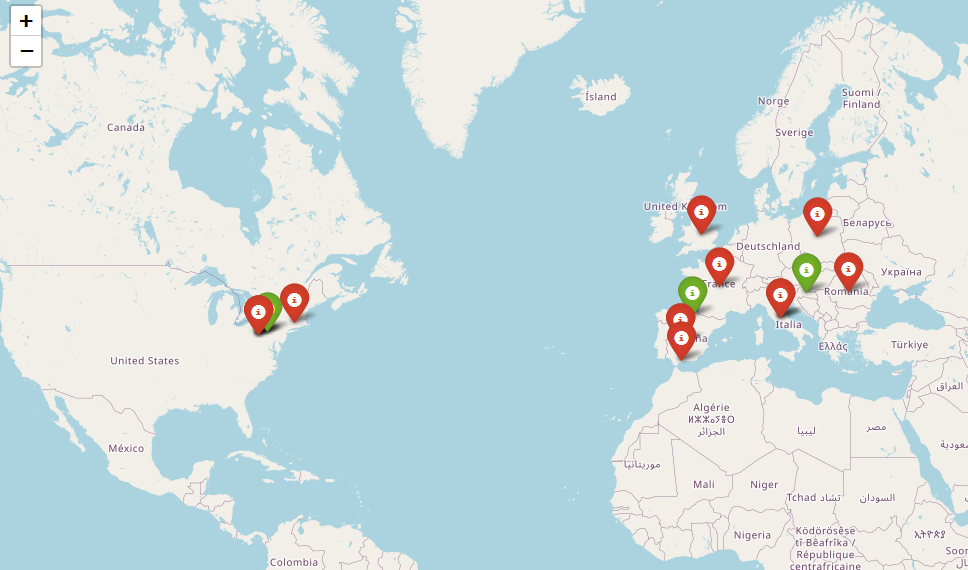

In [8]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "1.JPG")


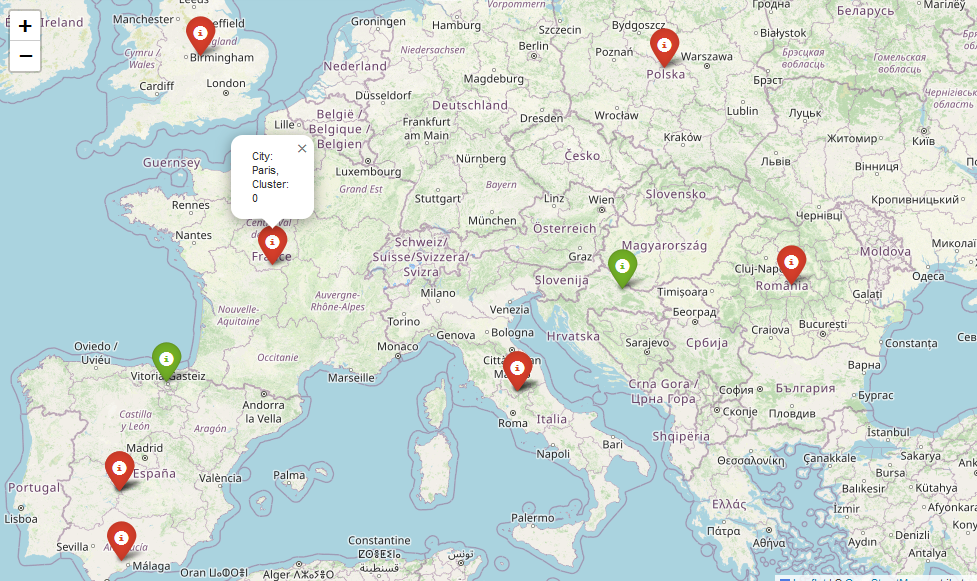

In [9]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "2.JPG")


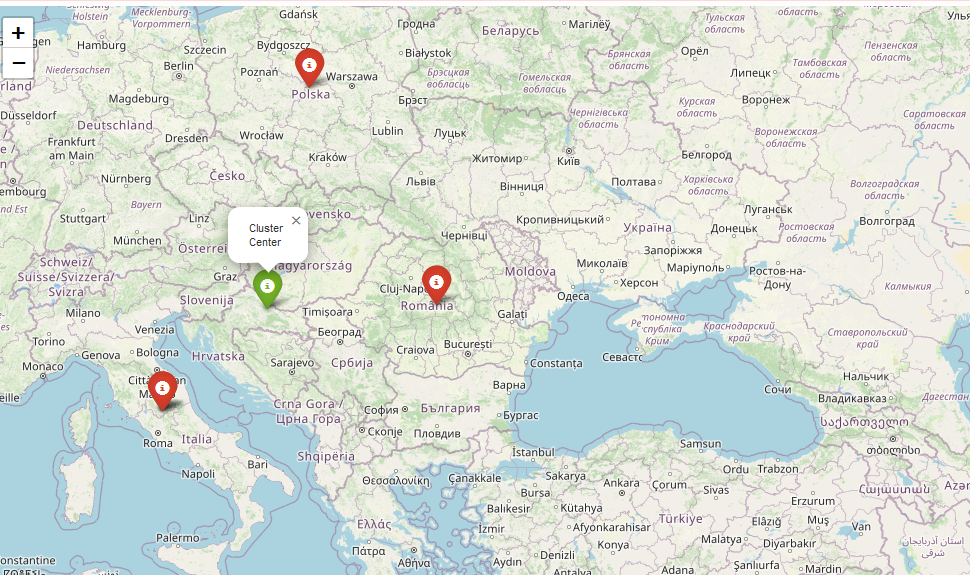

In [10]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "3.JPG")


In [ ]:

# https://geopy.readthedocs.io/en/stable/
